In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import squiggle_detector_object as sdo

/anaconda3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
name = '/Users/tessa/Music/israel-XC/XC156852 - Meadow Pipit - Anthus pratensis.wav'
file = sdo.Audio(filename = name)

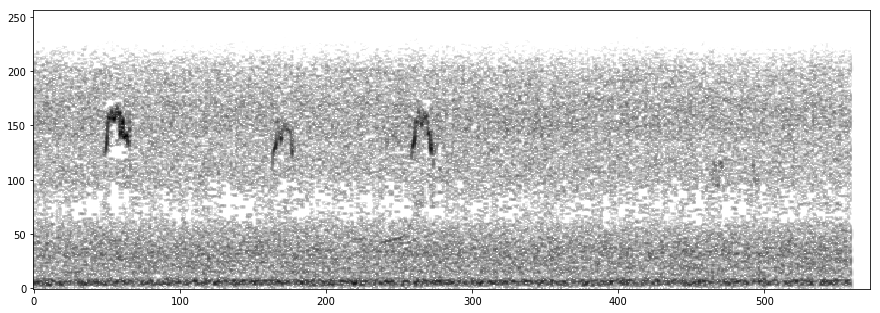

In [4]:
sdo.plotter(spectrogram = file.raw.spect, db=True)

In [5]:
file.normalize()

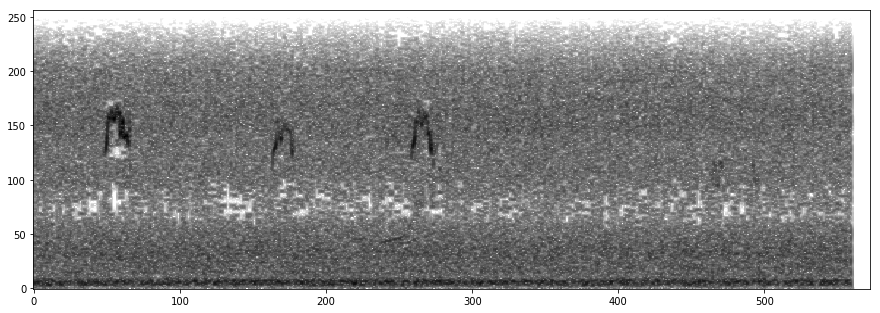

In [6]:
sdo.plotter(spectrogram = file.normalized.spect, db=True)

In [7]:
file.binarize()

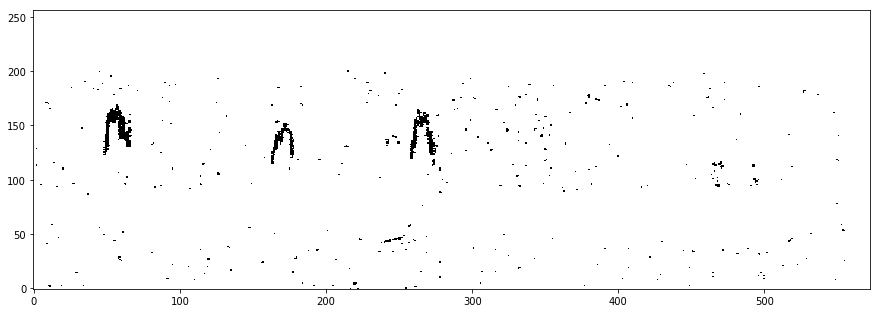

In [8]:
sdo.plotter(spectrogram = file.binarized.spect, db=True)

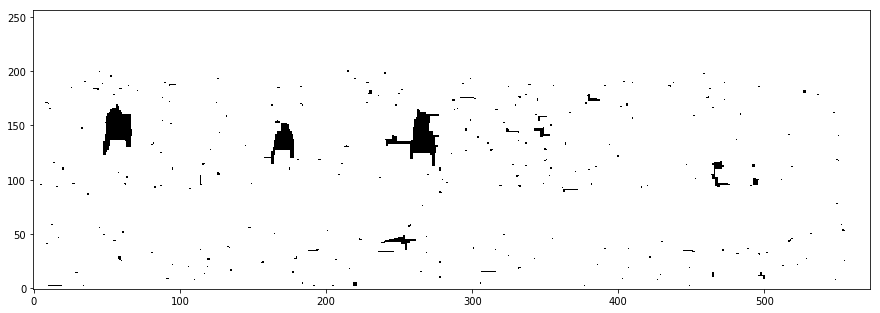

In [9]:
file.close(source_label = 'binarized', dest_label = 'processed')
sdo.plotter(spectrogram = file.processed.spect, db=True)

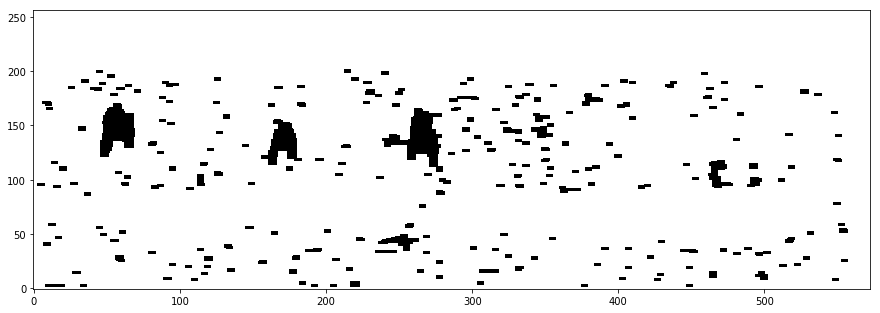

In [10]:
file.dilate(source_label = 'processed', dest_label = 'processed')
sdo.plotter(spectrogram = file.processed.spect, db=True)

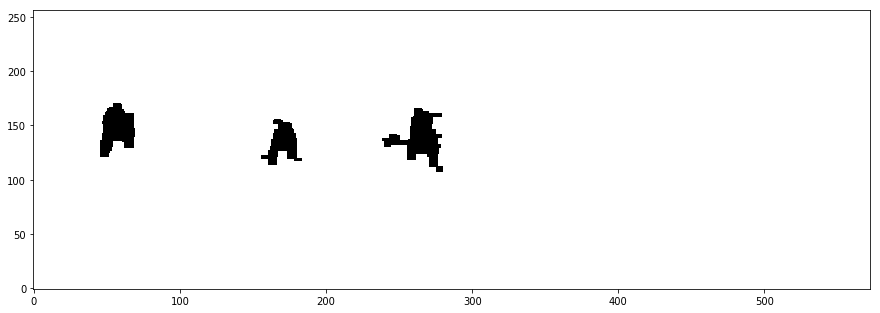

In [11]:
file.smallobj(source_label = 'processed', dest_label = 'processed', size=500)
sdo.plotter(spectrogram = file.processed.spect, db=True)

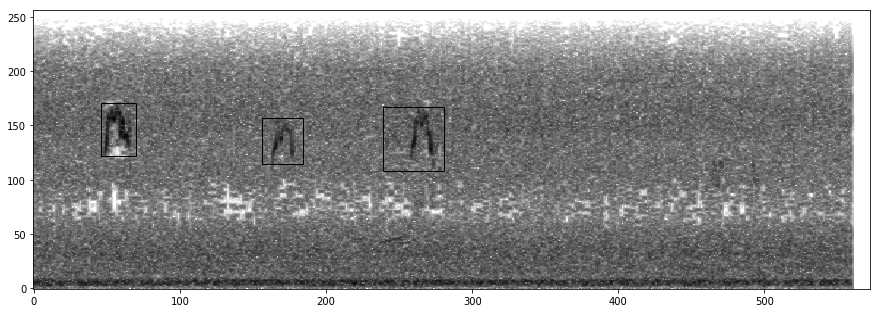

In [12]:
file.box(box_from = 'processed', box_on = 'normalized')
sdo.plotter(
    spectrogram = file.normalized.spect,
    boxes = file.normalized.pixel_boxes,
    db=True)


In [13]:
file.set_save_dests(
    helper_files_path = '/Users/tessa/Code/squiggle-detector/runs/object/helper_files',
    templates_path = '/Users/tessa/Code/squiggle-detector/runs/object/templates',
    species = 'example',
    author = 'Tessa-Rhinehart'
)

In [14]:
file.save_noise_and_detections_files('normalized')

Saved files to /Users/tessa/Code/squiggle-detector/runs/object/helper_files/example/noise.wav
Saved files to /Users/tessa/Code/squiggle-detector/runs/object/helper_files/example/detections.wav


In [15]:
file.audacity_noise_reduce(source_samples = 'samples', dest_spect = 'denoised')

Saved files to /Users/tessa/Code/squiggle-detector/runs/object/helper_files/example/denoised.wav


In [16]:
file.audacity_noise_reduce(source_samples = 'samples_dn', dest_spect = 'denoised')

Saved files to /Users/tessa/Code/squiggle-detector/runs/object/helper_files/example/denoised.wav


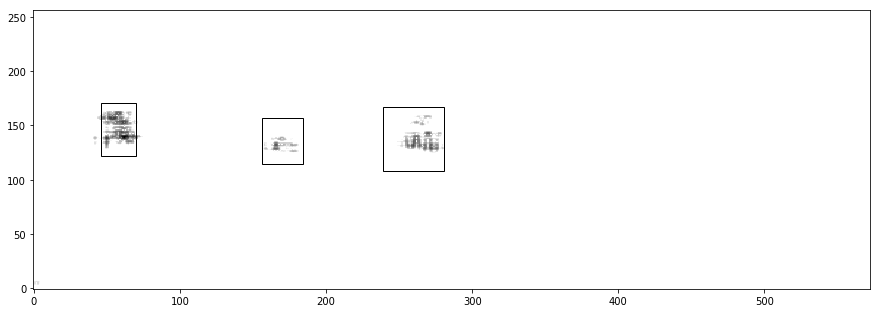

In [17]:
sdo.plotter(
    spectrogram = file.denoised.spect,
    boxes = file.normalized.pixel_boxes,
    db=True)

In [18]:
file.extract_segments_audio(
    box_source = 'normalized',
    sample_source = 'samples'
)

Saved files to /Users/tessa/Code/squiggle-detector/runs/object/templates/example/example_0.wav
Saved files to /Users/tessa/Code/squiggle-detector/runs/object/templates/example/example_1.wav
Saved files to /Users/tessa/Code/squiggle-detector/runs/object/templates/example/example_2.wav


In [19]:
%autoreload